In [2]:
path = "Resources/Valve_Player_Data.csv"

import matplotlib.pyplot as plt
import pandas as pd
import requests
import numpy as np
from pprint import pprint
import time
import datetime
from dateutil.relativedelta import relativedelta

In [3]:
monthly_players = pd.read_csv(path)
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,URL,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,https://steamcharts.com/app/730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,https://steamcharts.com/app/730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,https://steamcharts.com/app/730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,https://steamcharts.com/app/730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,https://steamcharts.com/app/730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,https://steamcharts.com/app/435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,https://steamcharts.com/app/435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,https://steamcharts.com/app/435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,https://steamcharts.com/app/435150,2016-09-01,Divinity: Original Sin 2


In [4]:
monthly_players.nunique()

Month_Year       111
Avg_players     5241
Gain            5135
Percent_Gain    3685
Peak_Players    4988
URL               98
Date             111
Game_Name         98
dtype: int64

In [5]:
monthly_players.dtypes

Month_Year       object
Avg_players     float64
Gain            float64
Percent_Gain     object
Peak_Players      int64
URL              object
Date             object
Game_Name        object
dtype: object

In [6]:
# EXTRACT AND TRANSFORM DATA

# drop first two months for every game as these extreme values will totally skew the data.

In [7]:
monthly_players.Game_Name.unique()

array(['Counter Strike: Global Offensive', 'Dota 2',
       'PUBG: Battlegrounds', 'Apex Legends', 'Team Fortress 2',
       'Grand Theft Auto V', 'NARAKA: BLADEPOINT', 'Wallpaper Engine',
       'Rust', 'Destiny 2', 'Warframe', 'Cookie Clicker',
       "Tom Clancy's Rainbow Six Seige", 'Football Manager 2021 ',
       'PAYDAY 2', 'ARK: Survival Evolved', 'Dead by Daylight',
       "Sid Meier's Civilization VI", 'MIR4', 'Unturned', 'Terraria',
       'War Thunder', 'Hearts of Iron IV', 'Battlefield V', 'Valheim',
       'World of Tanks Blitz', 'Dayz', 'Total War: WARHAMMER II',
       "Don't Starve Together", 'Euro Truck Simulator 2', 'Rocket League',
       "Garry's Mod", 'Monster Hunter: World', 'Stardew Valley',
       'FINAL FANTASY XIV Online', 'Bless Unleashed ',
       'The Witcher 3: Wild Hunt', '雀魂麻将(MahjongSoul)', 'RimWorld',
       'Red Dead Redemption 2', '7 Days to Die', 'Black Desert',
       'Cities: Skylines', "Sid Meier's Civilization V",
       'Farming Simulator 19',

In [8]:
ID_list = monthly_players.URL.unique()

In [9]:
for i in range(0,len(ID_list)):
    ID_list[i] = ID_list[i].replace('https://steamcharts.com/app/', '')
ID_list

array(['730', '570', '578080', '1172470', '440', '271590', '1203220',
       '431960', '252490', '1085660', '230410', '1454400', '359550',
       '1263850', '218620', '346110', '381210', '289070', '1623660',
       '304930', '105600', '236390', '394360', '1238810', '892970',
       '444200', '221100', '594570', '322330', '227300', '252950', '4000',
       '582010', '413150', '39210', '1254120', '292030', '1329410',
       '294100', '1174180', '251570', '582660', '255710', '8930',
       '787860', '489830', '281990', '306130', '550', '1293830', '236850',
       '480', '813780', '1184370', '601510', '250900', '513710', '377160',
       '427520', '261550', '1281930', '1644960', '960090', '291550',
       '438100', '1097150', '107410', '1100600', '552990', '1313860',
       '374320', '1158310', '835570', '275850', '1259970', '1172620',
       '10', '740130', '238960', '629520', '1091500', '1129580',
       '1222680', '739630', '1225330', '1049590', '453480', '594650',
       '526870', '322

In [12]:
# Strip the URL data off the app ID
url_list = monthly_players["URL"]
for i in range(0,len(url_list)):
    url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')

C:\Users\David\AppData\Local\Temp/ipykernel_8100/1115660068.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  url_list[i] = url_list[i].replace('https://steamcharts.com/app/', '')


In [13]:
monthly_players = monthly_players.rename(columns={"URL": "APP"})
monthly_players

,Month_Year,Avg_players,Gain,Percent_Gain,Peak_Players,APP,Date,Game_Name
0,September 2021,512350.92,268.96,+0.05%,942519,730,2021-09-01,Counter Strike: Global Offensive
1,August 2021,512081.96,6014.60,+1.19%,802544,730,2021-08-01,Counter Strike: Global Offensive
2,July 2021,506067.36,-43279.72,-7.88%,763523,730,2021-07-01,Counter Strike: Global Offensive
3,June 2021,549347.08,-110541.81,-16.75%,929940,730,2021-06-01,Counter Strike: Global Offensive
4,May 2021,659888.89,-63457.63,-8.77%,1087197,730,2021-05-01,Counter Strike: Global Offensive
...,...,...,...,...,...,...,...,...
5266,December 2016,192.03,-21.90,-10.24%,405,435150,2016-12-01,Divinity: Original Sin 2
5267,November 2016,213.92,-134.68,-38.63%,537,435150,2016-11-01,Divinity: Original Sin 2
5268,October 2016,348.60,-201.75,-36.66%,1031,435150,2016-10-01,Divinity: Original Sin 2
5269,September 2016,550.36,543.26,+7654.89%,2836,435150,2016-09-01,Divinity: Original Sin 2


In [14]:
# split dataframe into relational dataframes
games = monthly_players[["APP", "Game_Name"]]
games = games.drop_duplicates().set_index("APP")
games

,Game_Name
APP,
730,Counter Strike: Global Offensive
570,Dota 2
578080,PUBG: Battlegrounds
1172470,Apex Legends
440,Team Fortress 2
...,...
1238840,Battlefield 1
239140,Dying Light
646570,Slay the Spire


In [15]:
reduced_players = monthly_players[["Percent_Gain", "APP", "Date"]]
reduced_players

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5266,-10.24%,435150,2016-12-01
5267,-38.63%,435150,2016-11-01
5268,-36.66%,435150,2016-10-01
5269,+7654.89%,435150,2016-09-01


## Remove bad rows

In [16]:
# Drop games with 1 or 2 rows; this is not enough data to extrapolate from, 
# as we will need to drop the first two months of a game's existence
game_id = reduced_players.APP.value_counts()
print(game_id)
clean_ID_list = []

for i in range(0,len(game_id)):
    if game_id[i] > 2:
        clean_ID_list.append(game_id.index[i])
    else:
        print(f"removing {games.loc[game_id.index[i]]}(app ID {game_id.index[i]}) due to having too few months of data")
        
len(clean_ID_list)

730        111
550        111
570        111
440        111
4000       111
          ... 
1203220      2
740130       1
1644960      1
1454400      1
1184370      1
Name: APP, Length: 98, dtype: int64
removing Game_Name    MIR4
Name: 1623660, dtype: object(app ID 1623660) due to having too few months of data
removing Game_Name    Bless Unleashed 
Name: 1254120, dtype: object(app ID 1254120) due to having too few months of data
removing Game_Name    NARAKA: BLADEPOINT
Name: 1203220, dtype: object(app ID 1203220) due to having too few months of data
removing Game_Name    Tales of Arise
Name: 740130, dtype: object(app ID 740130) due to having too few months of data
removing Game_Name    NBA 2k22
Name: 1644960, dtype: object(app ID 1644960) due to having too few months of data
removing Game_Name    Cookie Clicker
Name: 1454400, dtype: object(app ID 1454400) due to having too few months of data
removing Game_Name    Pathfinder: Wrath of Righteous
Name: 1184370, dtype: object(app ID 1184370)

91

In [17]:
# drop bottom two rows of each app, as the initial 2 months feature unusable data (NaN, followed by extreme outlier due to percentage calculation)
temp_df =pd.DataFrame(columns = reduced_players.columns)

for ID in clean_ID_list:
    df = reduced_players[reduced_players.APP == ID]
    df = df.reset_index(drop=True)
    print(df)
    df = df.drop(len(df)-1)
    df = df.drop(len(df)-1)
    print(df)
    temp_df = pd.concat([temp_df, df], ignore_index=True)
reduced_players = temp_df

    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01
109    +1559.43%  730  2012-08-01
110          NaN  730  2012-07-01

[111 rows x 3 columns]
    Percent_Gain  APP        Date
0         +0.05%  730  2021-09-01
1         +1.19%  730  2021-08-01
2         -7.88%  730  2021-07-01
3        -16.75%  730  2021-06-01
4         -8.77%  730  2021-05-01
..           ...  ...         ...
104      +14.81%  730  2013-01-01
105       -0.39%  730  2012-12-01
106      +31.61%  730  2012-11-01
107      -32.88%  730  2012-10-01
108       +3.39%  730  2012-09-01

[109 rows x 3 columns]
    Percent_Gain  APP        Date
0        -14.13%  550  2021-09-01
1         -0.46%  550  2021-08-01
2        +20.23%  550  2021-07-01


[83 rows x 3 columns]
   Percent_Gain     APP        Date
0       -16.05%  250900  2021-09-01
1       -12.95%  250900  2021-08-01
2       -21.30%  250900  2021-07-01
3       -33.62%  250900  2021-06-01
4       -25.42%  250900  2021-05-01
..          ...     ...         ...
76       -2.28%  250900  2015-05-01
77      -17.31%  250900  2015-04-01
78      -13.64%  250900  2015-03-01
79      -26.18%  250900  2015-02-01
80      -17.33%  250900  2015-01-01

[81 rows x 3 columns]
   Percent_Gain     APP        Date
0        -3.36%  322170  2021-09-01
1        +0.33%  322170  2021-08-01
2        +3.25%  322170  2021-07-01
3       +15.07%  322170  2021-06-01
4       +18.36%  322170  2021-05-01
..          ...     ...         ...
77      +19.93%  322170  2015-04-01
78      +15.67%  322170  2015-03-01
79      +28.15%  322170  2015-02-01
80      +54.61%  322170  2015-01-01
81          NaN  322170  2014-12-01

[82 rows x 3 columns]
   Percent_Gain     APP        Date
0        -3.36%  322170  2021-09

   Percent_Gain     APP        Date
0       +22.92%  289070  2021-09-01
1       -10.77%  289070  2021-08-01
2       +18.82%  289070  2021-07-01
3        -4.21%  289070  2021-06-01
4       -11.56%  289070  2021-05-01
5        +1.62%  289070  2021-04-01
6       -17.46%  289070  2021-03-01
7       +13.57%  289070  2021-02-01
8       +11.93%  289070  2021-01-01
9        -3.33%  289070  2020-12-01
10       +4.47%  289070  2020-11-01
11       +4.35%  289070  2020-10-01
12       -7.63%  289070  2020-09-01
13      -10.45%  289070  2020-08-01
14       -5.41%  289070  2020-07-01
15       -4.77%  289070  2020-06-01
16       -4.05%  289070  2020-05-01
17      +21.55%  289070  2020-04-01
18      +19.17%  289070  2020-03-01
19       -8.17%  289070  2020-02-01
20      +10.33%  289070  2020-01-01
21      +25.55%  289070  2019-12-01
22       -5.26%  289070  2019-11-01
23      +14.24%  289070  2019-10-01
24       -3.97%  289070  2019-09-01
25      -12.57%  289070  2019-08-01
26      +19.00%  289070  201

   Percent_Gain      APP        Date
0       +15.63%  1222680  2021-09-01
1       -21.40%  1222680  2021-08-01
2       -32.67%  1222680  2021-07-01
3      +181.38%  1222680  2021-06-01
4       +52.86%  1222680  2021-05-01
5       -39.06%  1222680  2021-04-01
6       -38.02%  1222680  2021-03-01
7       -26.39%  1222680  2021-02-01
8       +58.79%  1222680  2021-01-01
9       +11.36%  1222680  2020-12-01
10      +31.41%  1222680  2020-11-01
11       +3.26%  1222680  2020-10-01
12      +18.91%  1222680  2020-09-01
13      -49.88%  1222680  2020-08-01
   Percent_Gain      APP        Date
0       -59.47%  1238840  2021-09-01
1       +22.10%  1238840  2021-08-01
2       +81.52%  1238840  2021-07-01
3      +124.74%  1238840  2021-06-01
4       -26.13%  1238840  2021-05-01
5       +13.61%  1238840  2021-04-01
6       -43.24%  1238840  2021-03-01
7       +92.16%  1238840  2021-02-01
8       +27.48%  1238840  2021-01-01
9       +95.80%  1238840  2020-12-01
10      -12.03%  1238840  2020-11-01
1

In [18]:
# reprint the cleaned up reduced_players
reduced_players

# nb: perhaps the above cleaning process could have been done in one step by simply catching and handling errors?

,Percent_Gain,APP,Date
0,+0.05%,730,2021-09-01
1,+1.19%,730,2021-08-01
2,-7.88%,730,2021-07-01
3,-16.75%,730,2021-06-01
4,-8.77%,730,2021-05-01
...,...,...,...
5074,-3.43%,1293830,2021-09-01
5075,-47.45%,1293830,2021-08-01
5076,+68.25%,1293830,2021-07-01
5077,+17.89%,1293830,2021-06-01


## Fix Datatypes


In [19]:
# strip off the percent symbol and convert it into a float
percentages = reduced_players["Percent_Gain"]
for i in range(0, len(reduced_players)):
    try:
        reduced_players.loc[i, "Percent_Gain"] = float(reduced_players.loc[i, "Percent_Gain"].replace("%",""))
    except AttributeError as e:
        app = reduced_players.loc[i, "APP"]
        print(f"error on app id {app}")
        print(e)

print(reduced_players.dtypes)

Percent_Gain    object
APP             object
Date            object
dtype: object


In [20]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01
1,1.19,730,2021-08-01
2,-7.88,730,2021-07-01
3,-16.75,730,2021-06-01
4,-8.77,730,2021-05-01
...,...,...,...
5074,-3.43,1293830,2021-09-01
5075,-47.45,1293830,2021-08-01
5076,68.25,1293830,2021-07-01
5077,17.89,1293830,2021-06-01


In [21]:
# check all percent values are now floats:
for i in range (0,len(reduced_players)):
    if(type(reduced_players.loc[i][0]) != float):
        print("non-float found")

In [22]:
# we can keep APP as a str as we don't want to be using it to make any predictions.

In [23]:
# convert 'Date' to true date-time format
for i in range (0,len(reduced_players)):
    reduced_players.loc[i][2] = pd.to_datetime(reduced_players.loc[i][2])

In [24]:
reduced_players

,Percent_Gain,APP,Date
0,0.05,730,2021-09-01 00:00:00
1,1.19,730,2021-08-01 00:00:00
2,-7.88,730,2021-07-01 00:00:00
3,-16.75,730,2021-06-01 00:00:00
4,-8.77,730,2021-05-01 00:00:00
...,...,...,...
5074,-3.43,1293830,2021-09-01 00:00:00
5075,-47.45,1293830,2021-08-01 00:00:00
5076,68.25,1293830,2021-07-01 00:00:00
5077,17.89,1293830,2021-06-01 00:00:00


## Read in news data

In [36]:
# this time, I am going to wrap the whole thing in a for loop, to do a separate call for each game.

Monthly_data_cleaned_joined = pd.DataFrame()

for app_no in clean_ID_list:
    if (app_no == '480'):
        # UPDATE!
        # skip app 480 - it is a secret test game and has no news feed.
        continue
    current_df = reduced_players[reduced_players.APP == app_no]
    current_df = current_df.reset_index(drop=True)
    print(current_df)
    
    # build dataframe from json data and reduce to relevant columns

    # call for just one news item
    count = 1
    max_length = 1024
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()

    # find out how many news items for this app, and then recall news items.
    count = news_response['appnews']['count']
    api_url = f"http://api.steampowered.com/ISteamNews/GetNewsForApp/v0002/?appid={app_no}&count={count}&maxlength={max_length}&format=json"
    news_response = requests.get(api_url).json()
    
    # new DF to store response
    newsDF = pd.DataFrame(columns=['Date', 'Label'])

    # get the date and label of each news item; we can ignore the actual text of the news item on this first approach.
    for item in (news_response['appnews']['newsitems']):
        # convert unix date to yyy-mm-dd
#         print(f"{pd.to_datetime(item['date'], unit='s')} {item['feedlabel']}")
        row = pd.DataFrame(data={'Date': [pd.to_datetime(item['date'], unit='s')], 'Label': [item['feedlabel']]})
        newsDF = pd.concat([newsDF, row])
    
    #reset the index and print out the important values from the dataframe
    newsDF = newsDF.reset_index(drop=True)
    print(newsDF)
    print(newsDF.nunique())
    print(newsDF.Label.value_counts())
    
    # add new label columns (if any) to the dataframe
    labels_index = newsDF.Label.value_counts().index
    for column in labels_index:
        current_df[column] = 0
    current_df
    print(current_df)
    
    # bin news feed into monthly groups
    for i in range(0, len(current_df)):
        # set start and end dates for the current month
        start_date = current_df.loc[i, 'Date']
        end_date = start_date + relativedelta(months = 1)
#         print(f"{start_date}, {end_date}")
        #identify rows from the newsDF that fall into that category
        for j in range(0, len(newsDF)):
            if ((newsDF.loc[j, 'Date'] >= start_date) & (newsDF.loc[j, 'Date'] < end_date)):
                # find the relevant label and increment that column on the overall grid
                feed_type = newsDF.loc[j, 'Label']
#                 print(feed_type)
                current_df.loc[i, feed_type] += 1
    Monthly_data_cleaned_joined = pd.concat([Monthly_data_cleaned_joined, current_df], ignore_index=True)

    Percent_Gain  APP                 Date
0           0.05  730  2021-09-01 00:00:00
1           1.19  730  2021-08-01 00:00:00
2          -7.88  730  2021-07-01 00:00:00
3         -16.75  730  2021-06-01 00:00:00
4          -8.77  730  2021-05-01 00:00:00
..           ...  ...                  ...
104        14.81  730  2013-01-01 00:00:00
105        -0.39  730  2012-12-01 00:00:00
106        31.61  730  2012-11-01 00:00:00
107       -32.88  730  2012-10-01 00:00:00
108         3.39  730  2012-09-01 00:00:00

[109 rows x 3 columns]
                    Date                    Label
0    2022-08-18 22:38:50                  SteamDB
1    2022-08-18 16:43:48              The Loadout
2    2022-08-18 13:33:47              The Loadout
3    2022-08-17 13:01:57              The Loadout
4    2022-08-16 22:37:21  Community Announcements
...                  ...                      ...
1310 2012-04-27 20:35:00           Product Update
1311 2012-04-20 17:26:00           Product Update
1312 2012-

    Percent_Gain  APP                 Date
0          -7.98  570  2021-09-01 00:00:00
1           0.43  570  2021-08-01 00:00:00
2           0.39  570  2021-07-01 00:00:00
3           1.53  570  2021-06-01 00:00:00
4           0.33  570  2021-05-01 00:00:00
..           ...  ...                  ...
104        21.18  570  2013-01-01 00:00:00
105        20.62  570  2012-12-01 00:00:00
106        33.06  570  2012-11-01 00:00:00
107        22.79  570  2012-10-01 00:00:00
108        10.94  570  2012-09-01 00:00:00

[109 rows x 3 columns]
                    Date                    Label
0    2022-08-16 03:46:08  Community Announcements
1    2022-08-11 17:10:45  Community Announcements
2    2022-08-11 07:00:07  Community Announcements
3    2022-08-03 23:05:06  Community Announcements
4    2022-08-03 23:04:28  Community Announcements
...                  ...                      ...
2957 2011-01-27 13:59:00           Dota Beta Blog
2958 2011-01-22 01:06:00           Dota Beta Blog
2959 2011-

    Percent_Gain   APP                 Date
0         -21.45  4000  2021-09-01 00:00:00
1           -0.6  4000  2021-08-01 00:00:00
2           9.91  4000  2021-07-01 00:00:00
3           2.85  4000  2021-06-01 00:00:00
4          -2.89  4000  2021-05-01 00:00:00
..           ...   ...                  ...
104        27.15  4000  2013-01-01 00:00:00
105         29.7  4000  2012-12-01 00:00:00
106        48.25  4000  2012-11-01 00:00:00
107         23.2  4000  2012-10-01 00:00:00
108       -34.05  4000  2012-09-01 00:00:00

[109 rows x 3 columns]
                   Date                    Label
0   2022-07-06 11:27:47                    VG247
1   2022-06-08 13:01:01  Community Announcements
2   2022-06-04 19:00:02                 PC Gamer
3   2022-06-01 17:53:30  Community Announcements
4   2022-05-31 11:00:13                 PC Gamer
..                  ...                      ...
292 2010-05-26 21:41:00           Product Update
293 2010-05-13 01:02:04           Product Update
294 201

    Percent_Gain     APP                 Date
0         -16.43  105600  2021-09-01 00:00:00
1          -2.88  105600  2021-08-01 00:00:00
2          -1.89  105600  2021-07-01 00:00:00
3          -4.03  105600  2021-06-01 00:00:00
4          17.93  105600  2021-05-01 00:00:00
..           ...     ...                  ...
104         29.8  105600  2013-01-01 00:00:00
105        16.75  105600  2012-12-01 00:00:00
106         24.6  105600  2012-11-01 00:00:00
107        -18.6  105600  2012-10-01 00:00:00
108       -16.88  105600  2012-09-01 00:00:00

[109 rows x 3 columns]
                   Date                    Label
0   2022-08-11 19:33:24  Community Announcements
1   2022-08-01 20:25:35                 PC Gamer
2   2022-08-01 19:43:21                 PC Gamer
3   2022-07-29 17:14:24  Community Announcements
4   2022-07-07 19:06:43  Community Announcements
..                  ...                      ...
253 2011-05-23 18:17:00           Product Update
254 2011-05-18 10:49:09     Rock

    Percent_Gain     APP                 Date
0          -0.63  227300  2021-09-01 00:00:00
1          -7.59  227300  2021-08-01 00:00:00
2           8.26  227300  2021-07-01 00:00:00
3         -10.88  227300  2021-06-01 00:00:00
4          -8.63  227300  2021-05-01 00:00:00
..           ...     ...                  ...
98        179.83  227300  2013-07-01 00:00:00
99        -21.03  227300  2013-06-01 00:00:00
100       -21.14  227300  2013-05-01 00:00:00
101       -17.42  227300  2013-04-01 00:00:00
102        -5.48  227300  2013-03-01 00:00:00

[103 rows x 3 columns]
                    Date                    Label
0    2022-08-09 15:03:19  Community Announcements
1    2022-07-28 08:29:18  Community Announcements
2    2022-07-07 15:01:46  Community Announcements
3    2022-06-29 14:45:51  Community Announcements
4    2022-06-28 16:56:27  Community Announcements
...                  ...                      ...
996  2013-04-23 17:00:00             Announcement
997  2013-04-17 13:00:47

    Percent_Gain     APP                 Date
0          -2.06  107410  2021-09-01 00:00:00
1            2.0  107410  2021-08-01 00:00:00
2          -6.09  107410  2021-07-01 00:00:00
3         -20.84  107410  2021-06-01 00:00:00
4           30.7  107410  2021-05-01 00:00:00
..           ...     ...                  ...
96         70.39  107410  2013-09-01 00:00:00
97          8.82  107410  2013-08-01 00:00:00
98         -1.41  107410  2013-07-01 00:00:00
99         77.11  107410  2013-06-01 00:00:00
100       -14.77  107410  2013-05-01 00:00:00

[101 rows x 3 columns]
                    Date                    Label
0    2022-08-18 16:00:08  Community Announcements
1    2022-07-14 16:00:27  Community Announcements
2    2022-07-12 13:26:50  Community Announcements
3    2022-07-12 13:20:59  Community Announcements
4    2022-07-12 13:10:55  Community Announcements
...                  ...                      ...
1328 2013-03-08 14:00:45     Rock, Paper, Shotgun
1329 2013-03-05 20:00:30

                    Date                    Label
0    2022-08-19 17:31:31  Community Announcements
1    2022-08-19 11:03:02  Community Announcements
2    2022-08-18 13:37:37  Community Announcements
3    2022-08-18 10:58:52  Community Announcements
4    2022-08-18 09:08:13  Community Announcements
...                  ...                      ...
3509 2013-09-10 18:40:54  Community Announcements
3510 2013-09-08 10:33:38  Community Announcements
3511 2013-09-06 15:09:58  Community Announcements
3512 2013-09-03 16:19:27  Community Announcements
3513 2013-08-15 12:49:00          Product Release

[3514 rows x 2 columns]
Date     2480
Label       9
dtype: int64
Community Announcements    3454
Rock, Paper, Shotgun         23
PCGamesN                     12
PC Gamer                     11
GamingOnLinux                 9
Product Release               2
VG247                         1
Eurogamer                     1
Announcement                  1
Name: Label, dtype: int64
   Percent_Gain     

   Percent_Gain     APP                 Date
0          -4.4  251570  2021-09-01 00:00:00
1          0.34  251570  2021-08-01 00:00:00
2          1.27  251570  2021-07-01 00:00:00
3         -7.17  251570  2021-06-01 00:00:00
4          6.29  251570  2021-05-01 00:00:00
..          ...     ...                  ...
87        52.22  251570  2014-06-01 00:00:00
88        -7.59  251570  2014-05-01 00:00:00
89       -20.62  251570  2014-04-01 00:00:00
90        29.17  251570  2014-03-01 00:00:00
91        24.42  251570  2014-02-01 00:00:00

[92 rows x 3 columns]
                   Date                    Label
0   2022-08-16 17:40:27  Community Announcements
1   2022-08-13 15:22:38  Community Announcements
2   2022-08-01 17:04:04  Community Announcements
3   2022-07-29 22:02:01  Community Announcements
4   2022-06-27 17:24:39  Community Announcements
..                  ...                      ...
341 2013-12-21 18:48:08  Community Announcements
342 2013-12-21 18:48:08  Community Announceme

   Percent_Gain     APP                 Date
0         -1.03  304930  2021-09-01 00:00:00
1          0.29  304930  2021-08-01 00:00:00
2          5.02  304930  2021-07-01 00:00:00
3          1.61  304930  2021-06-01 00:00:00
4          6.99  304930  2021-05-01 00:00:00
..          ...     ...                  ...
81         9.56  304930  2014-12-01 00:00:00
82       -13.55  304930  2014-11-01 00:00:00
83       -31.15  304930  2014-10-01 00:00:00
84       -55.92  304930  2014-09-01 00:00:00
85        -4.66  304930  2014-08-01 00:00:00

[86 rows x 3 columns]
                   Date                    Label
0   2022-08-12 17:23:06  Community Announcements
1   2022-07-15 15:43:05  Community Announcements
2   2022-07-07 16:00:09  Community Announcements
3   2022-06-03 14:00:45  Community Announcements
4   2022-05-20 16:00:28  Community Announcements
..                  ...                      ...
686 2014-07-01 04:31:50  Community Announcements
687 2014-06-29 22:09:46  Community Announceme

   Percent_Gain     APP                 Date
0         -3.36  322170  2021-09-01 00:00:00
1          0.33  322170  2021-08-01 00:00:00
2          3.25  322170  2021-07-01 00:00:00
3         15.07  322170  2021-06-01 00:00:00
4         18.36  322170  2021-05-01 00:00:00
..          ...     ...                  ...
75        25.06  322170  2015-06-01 00:00:00
76         26.2  322170  2015-05-01 00:00:00
77        19.93  322170  2015-04-01 00:00:00
78        15.67  322170  2015-03-01 00:00:00
79        28.15  322170  2015-02-01 00:00:00

[80 rows x 3 columns]
                  Date                    Label
0  2021-08-13 17:20:58  Community Announcements
1  2020-01-19 15:06:55  Community Announcements
2  2019-12-14 23:59:00  Community Announcements
3  2019-06-26 06:30:56     Rock, Paper, Shotgun
4  2017-12-21 23:56:15  Community Announcements
5  2017-12-21 23:56:15  Community Announcements
6  2017-12-12 21:54:15  Community Announcements
7  2017-12-12 21:54:15  Community Announcements
8  20

                   Date                    Label
0   2022-06-23 14:03:36  Community Announcements
1   2022-06-13 16:00:42            GamingOnLinux
2   2022-06-10 15:26:44  Community Announcements
3   2022-06-09 17:07:45  Community Announcements
4   2022-06-08 16:02:50                    VG247
..                  ...                      ...
342 2015-01-27 08:24:00          Product Release
343 2015-01-24 19:21:52  Community Announcements
344 2015-01-24 19:21:52  Community Announcements
345 2015-01-24 18:33:00             Announcement
346 2014-09-18 18:49:00             Announcement

[347 rows x 2 columns]
Date     291
Label      8
dtype: int64
Community Announcements    262
Rock, Paper, Shotgun        48
Announcement                11
GamingOnLinux                9
VG247                        6
Eurogamer                    5
Product Release              4
PCGamesN                     2
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0 

   Percent_Gain     APP                 Date
0        -16.95  346110  2021-09-01 00:00:00
1        -14.97  346110  2021-08-01 00:00:00
2        -25.12  346110  2021-07-01 00:00:00
3         64.42  346110  2021-06-01 00:00:00
4          -2.7  346110  2021-05-01 00:00:00
..          ...     ...                  ...
70       -13.57  346110  2015-11-01 00:00:00
71         7.11  346110  2015-10-01 00:00:00
72       -21.21  346110  2015-09-01 00:00:00
73        -3.65  346110  2015-08-01 00:00:00
74         9.08  346110  2015-07-01 00:00:00

[75 rows x 3 columns]
                   Date                    Label
0   2022-08-19 23:00:39  Community Announcements
1   2022-08-13 00:44:19  Community Announcements
2   2022-08-06 00:47:56  Community Announcements
3   2022-07-30 00:01:50  Community Announcements
4   2022-07-23 00:13:06  Community Announcements
..                  ...                      ...
893 2015-05-13 22:36:22  Community Announcements
894 2015-05-13 22:36:22  Community Announceme

                    Date                    Label
0    2022-08-08 16:44:42  Community Announcements
1    2022-08-02 17:01:07  Community Announcements
2    2022-07-26 17:36:07              The Loadout
3    2022-07-26 14:26:48  Community Announcements
4    2022-07-20 16:05:28  Community Announcements
...                  ...                      ...
1146 2015-07-09 22:32:59  Community Announcements
1147 2015-07-09 22:32:59  Community Announcements
1148 2015-07-08 11:00:45     Rock, Paper, Shotgun
1149 2015-07-07 21:17:00          Product Release
1150 2014-12-09 20:33:37                 PC Gamer

[1151 rows x 2 columns]
Date     925
Label     10
dtype: int64
Community Announcements    720
PC Gamer                   178
Rock, Paper, Shotgun       137
The Loadout                 61
Eurogamer                   31
PCGamesN                    12
VG247                        4
Announcement                 4
Product Release              3
Product Update               1
Name: Label, dtype: int64


   Percent_Gain     APP                 Date
0          2.47  359550  2021-09-01 00:00:00
1         -6.67  359550  2021-08-01 00:00:00
2          -2.7  359550  2021-07-01 00:00:00
3         -5.69  359550  2021-06-01 00:00:00
4         -21.9  359550  2021-05-01 00:00:00
..          ...     ...                  ...
63        27.34  359550  2016-06-01 00:00:00
64        -7.51  359550  2016-05-01 00:00:00
65        24.78  359550  2016-04-01 00:00:00
66       -33.88  359550  2016-03-01 00:00:00
67        -9.57  359550  2016-02-01 00:00:00

[68 rows x 3 columns]
                    Date                    Label
0    2022-08-21 17:23:18              The Loadout
1    2022-08-21 17:22:49              The Loadout
2    2022-08-19 16:34:00              The Loadout
3    2022-08-01 16:44:26  Community Announcements
4    2022-07-21 11:06:07  Community Announcements
...                  ...                      ...
1226 2015-08-04 20:02:10  Community Announcements
1227 2015-07-31 14:53:45  Community A

   Percent_Gain     APP                 Date
0         -8.01  394360  2021-09-01 00:00:00
1          6.77  394360  2021-08-01 00:00:00
2          2.41  394360  2021-07-01 00:00:00
3         -3.31  394360  2021-06-01 00:00:00
4           6.9  394360  2021-05-01 00:00:00
..          ...     ...                  ...
59        -9.04  394360  2016-10-01 00:00:00
60        -6.52  394360  2016-09-01 00:00:00
61       -30.04  394360  2016-08-01 00:00:00
62       -27.31  394360  2016-07-01 00:00:00
63    276542.65  394360  2016-06-01 00:00:00

[64 rows x 3 columns]
                   Date                    Label
0   2022-08-17 13:00:11  Community Announcements
1   2022-08-10 13:00:13  Community Announcements
2   2022-08-08 12:25:19  Community Announcements
3   2022-08-03 13:00:10  Community Announcements
4   2022-08-02 14:46:19  Community Announcements
..                  ...                      ...
560 2016-01-22 11:57:21  Community Announcements
561 2016-01-15 11:33:18  Community Announceme

   Percent_Gain     APP                 Date
0        -26.09  457140  2021-09-01 00:00:00
1         11.58  457140  2021-08-01 00:00:00
2         -3.86  457140  2021-07-01 00:00:00
3         28.85  457140  2021-06-01 00:00:00
4         11.24  457140  2021-05-01 00:00:00
..          ...     ...                  ...
57       -50.54  457140  2016-12-01 00:00:00
58        10.99  457140  2016-11-01 00:00:00
59         -2.9  457140  2016-10-01 00:00:00
60       -22.39  457140  2016-09-01 00:00:00
61        24.21  457140  2016-08-01 00:00:00

[62 rows x 3 columns]
                   Date                    Label
0   2022-08-04 13:22:36            GamingOnLinux
1   2022-08-03 18:34:20  Community Announcements
2   2022-07-13 19:14:48  Community Announcements
3   2022-06-09 22:06:35  Community Announcements
4   2022-06-03 15:47:30            GamingOnLinux
..                  ...                      ...
222 2016-12-24 01:19:41  Community Announcements
223 2016-09-23 10:13:02     Rock, Paper, Shot

                   Date                    Label
0   2022-07-31 16:00:00                  SteamDB
1   2022-07-27 11:17:47  Community Announcements
2   2022-07-24 22:59:00               Gamemag.ru
3   2022-07-21 01:52:00               Gamemag.ru
4   2022-07-20 15:24:48                 PC Gamer
..                  ...                      ...
546 2016-07-27 18:00:25     Rock, Paper, Shotgun
547 2016-07-26 11:32:16     Rock, Paper, Shotgun
548 2016-07-22 15:18:20     Rock, Paper, Shotgun
549 2016-07-21 20:47:34     Rock, Paper, Shotgun
550 2016-07-20 15:51:47     Rock, Paper, Shotgun

[551 rows x 2 columns]
Date     524
Label     13
dtype: int64
PC Gamer                   173
Rock, Paper, Shotgun       154
Community Announcements    112
Eurogamer                   47
PCGamesN                    22
Gamemag.ru                  15
VG247                       10
SteamDB                      9
Announcement                 3
GamingOnLinux                2
Product Release              2
pressake

   Percent_Gain     APP                 Date
0         40.81  435150  2021-09-01 00:00:00
1        -15.57  435150  2021-08-01 00:00:00
2          6.38  435150  2021-07-01 00:00:00
3         15.51  435150  2021-06-01 00:00:00
4         -2.75  435150  2021-05-01 00:00:00
5        -14.03  435150  2021-04-01 00:00:00
6         -8.01  435150  2021-03-01 00:00:00
7          -8.7  435150  2021-02-01 00:00:00
8         14.72  435150  2021-01-01 00:00:00
9        -19.55  435150  2020-12-01 00:00:00
10        -6.26  435150  2020-11-01 00:00:00
11         6.86  435150  2020-10-01 00:00:00
12        17.06  435150  2020-09-01 00:00:00
13       -25.47  435150  2020-08-01 00:00:00
14        12.72  435150  2020-07-01 00:00:00
15       -11.37  435150  2020-06-01 00:00:00
16         -6.1  435150  2020-05-01 00:00:00
17       -10.39  435150  2020-04-01 00:00:00
18        68.65  435150  2020-03-01 00:00:00
19        -1.47  435150  2020-02-01 00:00:00
20        10.12  435150  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0         -1.38  431960  2021-09-01 00:00:00
1          5.97  431960  2021-08-01 00:00:00
2          2.33  431960  2021-07-01 00:00:00
3          9.79  431960  2021-06-01 00:00:00
4          0.73  431960  2021-05-01 00:00:00
5          -6.2  431960  2021-04-01 00:00:00
6         -7.07  431960  2021-03-01 00:00:00
7         -7.18  431960  2021-02-01 00:00:00
8         10.05  431960  2021-01-01 00:00:00
9         12.52  431960  2020-12-01 00:00:00
10        10.97  431960  2020-11-01 00:00:00
11        -4.27  431960  2020-10-01 00:00:00
12        -4.19  431960  2020-09-01 00:00:00
13         5.77  431960  2020-08-01 00:00:00
14        11.02  431960  2020-07-01 00:00:00
15         1.61  431960  2020-06-01 00:00:00
16         8.86  431960  2020-05-01 00:00:00
17          9.3  431960  2020-04-01 00:00:00
18        22.08  431960  2020-03-01 00:00:00
19        20.25  431960  2020-02-01 00:00:00
20        11.15  431960  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0        -10.04  489830  2021-09-01 00:00:00
1         14.16  489830  2021-08-01 00:00:00
2         24.92  489830  2021-07-01 00:00:00
3         -9.39  489830  2021-06-01 00:00:00
4          2.72  489830  2021-05-01 00:00:00
5         -2.41  489830  2021-04-01 00:00:00
6        -15.68  489830  2021-03-01 00:00:00
7          2.72  489830  2021-02-01 00:00:00
8          24.3  489830  2021-01-01 00:00:00
9          5.42  489830  2020-12-01 00:00:00
10         2.31  489830  2020-11-01 00:00:00
11        -8.23  489830  2020-10-01 00:00:00
12       -18.18  489830  2020-09-01 00:00:00
13         2.96  489830  2020-08-01 00:00:00
14         8.64  489830  2020-07-01 00:00:00
15         3.94  489830  2020-06-01 00:00:00
16        -5.86  489830  2020-05-01 00:00:00
17         18.6  489830  2020-04-01 00:00:00
18         2.14  489830  2020-03-01 00:00:00
19        -8.07  489830  2020-02-01 00:00:00
20        21.16  489830  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0          7.08  453480  2021-09-01 00:00:00
1        -38.28  453480  2021-08-01 00:00:00
2          8.94  453480  2021-07-01 00:00:00
3         35.62  453480  2021-06-01 00:00:00
4        -14.43  453480  2021-05-01 00:00:00
5         40.69  453480  2021-04-01 00:00:00
6         -9.62  453480  2021-03-01 00:00:00
7        -31.01  453480  2021-02-01 00:00:00
8         18.75  453480  2021-01-01 00:00:00
9         17.96  453480  2020-12-01 00:00:00
10        -16.5  453480  2020-11-01 00:00:00
11        12.24  453480  2020-10-01 00:00:00
12        -9.81  453480  2020-09-01 00:00:00
13       -28.91  453480  2020-08-01 00:00:00
14        17.49  453480  2020-07-01 00:00:00
15        11.22  453480  2020-06-01 00:00:00
16       -19.91  453480  2020-05-01 00:00:00
17        46.25  453480  2020-04-01 00:00:00
18         1.36  453480  2020-03-01 00:00:00
19       -20.29  453480  2020-02-01 00:00:00
20        16.61  453480  2020-01-01 00:00:00
21        

                   Date                    Label
0   2022-08-17 13:01:11  Community Announcements
1   2022-08-05 07:00:14  Community Announcements
2   2022-08-01 13:05:17  Community Announcements
3   2022-07-15 13:00:21  Community Announcements
4   2022-07-05 09:52:54  Community Announcements
..                  ...                      ...
405 2016-10-20 17:45:25  Community Announcements
406 2016-10-08 17:44:22  Community Announcements
407 2016-10-08 17:44:22  Community Announcements
408 2016-10-06 19:33:16  Community Announcements
409 2016-10-06 19:33:16  Community Announcements

[410 rows x 2 columns]
Date     343
Label      2
dtype: int64
Community Announcements    408
Product Release              2
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0          6.26  444200  2021-09-01 00:00:00                        0   
1           2.1  444200  2021-08-01 00:00:00                        0   
2         -4.29  444200  2021-07-01 00:00:

                   Date                    Label
0   2022-08-08 19:00:26  Community Announcements
1   2022-07-12 13:01:14  Community Announcements
2   2022-07-08 16:39:45  Community Announcements
3   2022-03-16 17:30:27  Community Announcements
4   2022-02-28 23:19:56  Community Announcements
..                  ...                      ...
570 2016-05-25 14:37:12  Community Announcements
571 2016-05-25 14:37:12  Community Announcements
572 2016-05-11 15:28:21  Community Announcements
573 2016-05-11 15:28:21  Community Announcements
574 2016-05-11 15:05:00             Announcement

[575 rows x 2 columns]
Date     497
Label     10
dtype: int64
Community Announcements    237
Rock, Paper, Shotgun       109
PC Gamer                    86
PCGamesN                    59
Strategy Gamer              43
GamingOnLinux               17
Eurogamer                   17
Announcement                 5
pressakey.com                1
Product Release              1
Name: Label, dtype: int64
   Percent_Ga

   Percent_Gain     APP                 Date
0          -6.6  438100  2021-09-01 00:00:00
1          7.39  438100  2021-08-01 00:00:00
2          6.29  438100  2021-07-01 00:00:00
3         -2.29  438100  2021-06-01 00:00:00
4          -2.1  438100  2021-05-01 00:00:00
5          2.75  438100  2021-04-01 00:00:00
6         -0.58  438100  2021-03-01 00:00:00
7         -1.66  438100  2021-02-01 00:00:00
8          17.0  438100  2021-01-01 00:00:00
9          7.58  438100  2020-12-01 00:00:00
10        17.36  438100  2020-11-01 00:00:00
11        -2.69  438100  2020-10-01 00:00:00
12        -9.35  438100  2020-09-01 00:00:00
13         2.95  438100  2020-08-01 00:00:00
14        -0.62  438100  2020-07-01 00:00:00
15        -5.03  438100  2020-06-01 00:00:00
16          0.4  438100  2020-05-01 00:00:00
17         23.9  438100  2020-04-01 00:00:00
18        18.63  438100  2020-03-01 00:00:00
19         0.08  438100  2020-02-01 00:00:00
20         8.53  438100  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0         -9.59  578080  2021-09-01 00:00:00
1         -0.76  578080  2021-08-01 00:00:00
2          3.85  578080  2021-07-01 00:00:00
3          -2.9  578080  2021-06-01 00:00:00
4         -0.76  578080  2021-05-01 00:00:00
5         -3.63  578080  2021-04-01 00:00:00
6         -2.94  578080  2021-03-01 00:00:00
7         -1.14  578080  2021-02-01 00:00:00
8          6.35  578080  2021-01-01 00:00:00
9          5.41  578080  2020-12-01 00:00:00
10        10.42  578080  2020-11-01 00:00:00
11        -3.85  578080  2020-10-01 00:00:00
12       -12.16  578080  2020-09-01 00:00:00
13        -9.07  578080  2020-08-01 00:00:00
14        -8.09  578080  2020-07-01 00:00:00
15        -5.31  578080  2020-06-01 00:00:00
16         0.17  578080  2020-05-01 00:00:00
17         6.29  578080  2020-04-01 00:00:00
18        -11.3  578080  2020-03-01 00:00:00
19        -6.46  578080  2020-02-01 00:00:00
20       -10.73  578080  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0        -15.74  594570  2021-09-01 00:00:00
1        -25.39  594570  2021-08-01 00:00:00
2         35.16  594570  2021-07-01 00:00:00
3          8.07  594570  2021-06-01 00:00:00
4          2.44  594570  2021-05-01 00:00:00
5        -14.05  594570  2021-04-01 00:00:00
6         -18.5  594570  2021-03-01 00:00:00
7         15.41  594570  2021-02-01 00:00:00
8        -12.06  594570  2021-01-01 00:00:00
9         33.43  594570  2020-12-01 00:00:00
10         4.12  594570  2020-11-01 00:00:00
11        20.12  594570  2020-10-01 00:00:00
12       -16.36  594570  2020-09-01 00:00:00
13        -18.3  594570  2020-08-01 00:00:00
14       -21.87  594570  2020-07-01 00:00:00
15       -11.76  594570  2020-06-01 00:00:00
16        47.76  594570  2020-05-01 00:00:00
17        16.22  594570  2020-04-01 00:00:00
18         1.28  594570  2020-03-01 00:00:00
19       -10.77  594570  2020-02-01 00:00:00
20        -7.44  594570  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0        -10.43  582660  2021-09-01 00:00:00
1        -14.69  582660  2021-08-01 00:00:00
2         31.23  582660  2021-07-01 00:00:00
3           2.0  582660  2021-06-01 00:00:00
4        -19.65  582660  2021-05-01 00:00:00
5         -21.0  582660  2021-04-01 00:00:00
6         71.55  582660  2021-03-01 00:00:00
7        -10.78  582660  2021-02-01 00:00:00
8         22.73  582660  2021-01-01 00:00:00
9          2.37  582660  2020-12-01 00:00:00
10        -6.27  582660  2020-11-01 00:00:00
11       -11.89  582660  2020-10-01 00:00:00
12        15.43  582660  2020-09-01 00:00:00
13         -5.7  582660  2020-08-01 00:00:00
14       -15.74  582660  2020-07-01 00:00:00
15        -8.49  582660  2020-06-01 00:00:00
16       -14.01  582660  2020-05-01 00:00:00
17        -3.61  582660  2020-04-01 00:00:00
18        60.05  582660  2020-03-01 00:00:00
19         5.49  582660  2020-02-01 00:00:00
20        31.44  582660  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0        -11.37  646570  2021-09-01 00:00:00
1          5.69  646570  2021-08-01 00:00:00
2         19.56  646570  2021-07-01 00:00:00
3          9.21  646570  2021-06-01 00:00:00
4          0.07  646570  2021-05-01 00:00:00
5        -13.66  646570  2021-04-01 00:00:00
6        -15.47  646570  2021-03-01 00:00:00
7         -7.75  646570  2021-02-01 00:00:00
8         11.34  646570  2021-01-01 00:00:00
9         18.56  646570  2020-12-01 00:00:00
10         7.55  646570  2020-11-01 00:00:00
11         3.71  646570  2020-10-01 00:00:00
12       -15.66  646570  2020-09-01 00:00:00
13        -0.47  646570  2020-08-01 00:00:00
14        18.71  646570  2020-07-01 00:00:00
15       -11.45  646570  2020-06-01 00:00:00
16        -12.0  646570  2020-05-01 00:00:00
17       -11.28  646570  2020-04-01 00:00:00
18       -16.03  646570  2020-03-01 00:00:00
19       -12.86  646570  2020-02-01 00:00:00
20        84.32  646570  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0           0.2  513710  2021-09-01 00:00:00
1          27.3  513710  2021-08-01 00:00:00
2         14.89  513710  2021-07-01 00:00:00
3        -19.83  513710  2021-06-01 00:00:00
4        -21.44  513710  2021-05-01 00:00:00
5         53.83  513710  2021-04-01 00:00:00
6         22.15  513710  2021-03-01 00:00:00
7         22.27  513710  2021-02-01 00:00:00
8         43.43  513710  2021-01-01 00:00:00
9          1.24  513710  2020-12-01 00:00:00
10         5.06  513710  2020-11-01 00:00:00
11        -3.75  513710  2020-10-01 00:00:00
12         7.25  513710  2020-09-01 00:00:00
13        42.03  513710  2020-08-01 00:00:00
14        16.03  513710  2020-07-01 00:00:00
15       -25.46  513710  2020-06-01 00:00:00
16        -4.06  513710  2020-05-01 00:00:00
17         8.15  513710  2020-04-01 00:00:00
18         -5.2  513710  2020-03-01 00:00:00
19        -5.74  513710  2020-02-01 00:00:00
20        11.59  513710  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0         -4.73  629520  2021-09-01 00:00:00
1          6.48  629520  2021-08-01 00:00:00
2          -2.5  629520  2021-07-01 00:00:00
3         -5.54  629520  2021-06-01 00:00:00
4         -7.73  629520  2021-05-01 00:00:00
5          3.33  629520  2021-04-01 00:00:00
6          2.98  629520  2021-03-01 00:00:00
7          4.41  629520  2021-02-01 00:00:00
8         19.31  629520  2021-01-01 00:00:00
9          1.44  629520  2020-12-01 00:00:00
10         9.41  629520  2020-11-01 00:00:00
11         9.85  629520  2020-10-01 00:00:00
12         2.16  629520  2020-09-01 00:00:00
13         2.56  629520  2020-08-01 00:00:00
14         1.65  629520  2020-07-01 00:00:00
15        -2.28  629520  2020-06-01 00:00:00
16         1.32  629520  2020-05-01 00:00:00
17        55.76  629520  2020-04-01 00:00:00
18        26.68  629520  2020-03-01 00:00:00
19         9.91  629520  2020-02-01 00:00:00
20        20.03  629520  2020-01-01 00:00:00
21        

                   Date                    Label
0   2022-08-17 15:11:54  Community Announcements
1   2022-08-16 16:12:07  Community Announcements
2   2022-08-12 14:00:31  Community Announcements
3   2022-08-11 16:05:35  Community Announcements
4   2022-08-10 19:23:11  Community Announcements
..                  ...                      ...
927 2017-12-12 13:45:50  Community Announcements
928 2017-12-12 13:45:50  Community Announcements
929 2017-12-12 11:29:25  Community Announcements
930 2017-12-12 11:29:25  Community Announcements
931 2017-11-09 18:19:00                Eurogamer

[932 rows x 2 columns]
Date     812
Label      9
dtype: int64
Community Announcements    844
PC Gamer                    46
Rock, Paper, Shotgun        26
Eurogamer                    8
Gamemag.ru                   3
Announcement                 2
VG247                        1
pressakey.com                1
Product Release              1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date

   Percent_Gain     APP                 Date
0         -3.25  552990  2021-09-01 00:00:00
1          8.62  552990  2021-08-01 00:00:00
2         -6.76  552990  2021-07-01 00:00:00
3         -4.78  552990  2021-06-01 00:00:00
4         11.72  552990  2021-05-01 00:00:00
5         -3.86  552990  2021-04-01 00:00:00
6        -37.15  552990  2021-03-01 00:00:00
7         43.69  552990  2021-02-01 00:00:00
8          9.43  552990  2021-01-01 00:00:00
9          3.55  552990  2020-12-01 00:00:00
10        -7.98  552990  2020-11-01 00:00:00
11        -6.35  552990  2020-10-01 00:00:00
12        -12.0  552990  2020-09-01 00:00:00
13         1.23  552990  2020-08-01 00:00:00
14         3.88  552990  2020-07-01 00:00:00
15         -7.8  552990  2020-06-01 00:00:00
16        -8.18  552990  2020-05-01 00:00:00
17        -1.15  552990  2020-04-01 00:00:00
18         1.75  552990  2020-03-01 00:00:00
19        41.46  552990  2020-02-01 00:00:00
20          7.1  552990  2020-01-01 00:00:00
21        

   Percent_Gain     APP                 Date
0        -14.22  601510  2021-09-01 00:00:00
1          7.88  601510  2021-08-01 00:00:00
2         -6.12  601510  2021-07-01 00:00:00
3          6.24  601510  2021-06-01 00:00:00
4         11.19  601510  2021-05-01 00:00:00
5          2.25  601510  2021-04-01 00:00:00
6         -5.67  601510  2021-03-01 00:00:00
7         -8.67  601510  2021-02-01 00:00:00
8         25.09  601510  2021-01-01 00:00:00
9         -7.53  601510  2020-12-01 00:00:00
10        -7.12  601510  2020-11-01 00:00:00
11        17.49  601510  2020-10-01 00:00:00
12        -1.21  601510  2020-09-01 00:00:00
13         7.25  601510  2020-08-01 00:00:00
14       -10.99  601510  2020-07-01 00:00:00
15        -6.63  601510  2020-06-01 00:00:00
16         8.79  601510  2020-05-01 00:00:00
17        10.12  601510  2020-04-01 00:00:00
18        23.46  601510  2020-03-01 00:00:00
19         1.13  601510  2020-02-01 00:00:00
20        10.14  601510  2020-01-01 00:00:00
21       -

                   Date                    Label
0   2022-06-20 13:48:42  Community Announcements
1   2022-04-28 09:13:40  Community Announcements
2   2022-03-15 01:06:57  Community Announcements
3   2022-02-01 20:37:40                    VG247
4   2022-01-12 18:53:02  Community Announcements
..                  ...                      ...
546 2018-07-26 19:00:32                 PC Gamer
547 2018-07-26 13:30:05     Rock, Paper, Shotgun
548 2018-07-16 16:48:10     Rock, Paper, Shotgun
549 2018-07-16 11:00:17     Rock, Paper, Shotgun
550 2018-07-09 17:25:44     Rock, Paper, Shotgun

[551 rows x 2 columns]
Date     549
Label      8
dtype: int64
Community Announcements    217
Rock, Paper, Shotgun       186
PC Gamer                    79
Eurogamer                   51
PCGamesN                    13
VG247                        3
Announcement                 1
Product Release              1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0 

                  Date                    Label
0  2022-05-24 22:07:43                 PC Gamer
1  2021-08-26 18:00:03              The Loadout
2  2021-07-06 15:39:00                Eurogamer
3  2021-06-22 12:05:59  Community Announcements
4  2021-06-09 13:31:51     Rock, Paper, Shotgun
..                 ...                      ...
56 2018-09-21 13:25:10     Rock, Paper, Shotgun
57 2018-09-21 10:01:22  Community Announcements
58 2018-08-03 12:46:09  Community Announcements
59 2018-07-24 10:26:15  Community Announcements
60 2018-07-24 10:16:44  Community Announcements

[61 rows x 2 columns]
Date     61
Label     6
dtype: int64
Community Announcements    35
Rock, Paper, Shotgun       14
PC Gamer                    8
Eurogamer                   2
The Loadout                 1
Announcement                1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0         -6.51  787860  2021-09-01 00:00:00                        0   
1          7

                   Date                    Label
0   2021-11-15 16:22:49                 PCGamesN
1   2021-09-02 18:17:10                 PCGamesN
2   2021-08-23 16:11:58           Strategy Gamer
3   2021-06-04 13:21:30                 PCGamesN
4   2021-05-28 18:17:01           Strategy Gamer
..                  ...                      ...
338 2018-01-12 17:24:02  Community Announcements
339 2018-01-12 17:24:02  Community Announcements
340 2018-01-11 16:00:11  Community Announcements
341 2018-01-11 16:00:11  Community Announcements
342 2018-01-10 16:54:23     Rock, Paper, Shotgun

[343 rows x 2 columns]
Date     341
Label      9
dtype: int64
Community Announcements    238
Rock, Paper, Shotgun        47
Eurogamer                   15
PC Gamer                    14
PCGamesN                    12
Strategy Gamer               9
GamingOnLinux                4
Announcement                 3
Product Release              1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date

   Percent_Gain      APP                 Date
0         56.97  1085660  2021-09-01 00:00:00
1          9.49  1085660  2021-08-01 00:00:00
2          -8.1  1085660  2021-07-01 00:00:00
3        -18.89  1085660  2021-06-01 00:00:00
4         53.71  1085660  2021-05-01 00:00:00
5        -14.47  1085660  2021-04-01 00:00:00
6        -10.18  1085660  2021-03-01 00:00:00
7         32.38  1085660  2021-02-01 00:00:00
8        -33.04  1085660  2021-01-01 00:00:00
9        -32.93  1085660  2020-12-01 00:00:00
10        96.62  1085660  2020-11-01 00:00:00
11        -4.69  1085660  2020-10-01 00:00:00
12       -17.04  1085660  2020-09-01 00:00:00
13         -6.1  1085660  2020-08-01 00:00:00
14       -11.75  1085660  2020-07-01 00:00:00
15         49.6  1085660  2020-06-01 00:00:00
16       -21.72  1085660  2020-05-01 00:00:00
17       -14.63  1085660  2020-04-01 00:00:00
18        23.03  1085660  2020-03-01 00:00:00
19        -4.41  1085660  2020-02-01 00:00:00
20       -28.44  1085660  2020-01-

                   Date                    Label
0   2022-08-19 03:29:03  Community Announcements
1   2022-08-15 21:00:28  Community Announcements
2   2022-08-10 01:09:12  Community Announcements
3   2022-08-05 02:00:51  Community Announcements
4   2022-07-29 17:00:51  Community Announcements
..                  ...                      ...
308 2019-06-11 12:14:19     Rock, Paper, Shotgun
309 2019-06-10 23:10:44  Community Announcements
310 2019-06-10 21:39:26  Community Announcements
311 2019-06-10 14:07:51     Rock, Paper, Shotgun
312 2019-06-10 01:27:15     Rock, Paper, Shotgun

[313 rows x 2 columns]
Date     311
Label      8
dtype: int64
Community Announcements    266
Rock, Paper, Shotgun        25
Strategy Gamer               6
PC Gamer                     5
Eurogamer                    5
PCGamesN                     4
The Loadout                  1
pressakey.com                1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0 

                   Date                    Label
0   2022-08-19 14:00:00                 PC Gamer
1   2022-08-17 18:15:46  Community Announcements
2   2022-07-22 08:19:26  Community Announcements
3   2022-06-16 14:36:14  Community Announcements
4   2022-06-09 15:57:12  Community Announcements
..                  ...                      ...
451 2017-05-06 19:57:23  Community Announcements
452 2017-03-24 16:33:58  Community Announcements
453 2017-03-24 16:33:58  Community Announcements
454 2016-10-20 09:25:25  Community Announcements
455 2016-10-20 09:25:25  Community Announcements

[456 rows x 2 columns]
Date     414
Label      4
dtype: int64
Community Announcements    346
Rock, Paper, Shotgun        68
PC Gamer                    36
PCGamesN                     6
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0        -12.73  261550  2021-09-01 00:00:00                        0   
1          1.88  261550  2021-08-01 00:00:00         

                   Date                    Label
0   2022-07-13 07:50:23  Community Announcements
1   2022-07-08 15:07:26  Community Announcements
2   2022-07-06 16:12:56  Community Announcements
3   2022-07-01 15:46:27  Community Announcements
4   2022-06-30 21:07:23  Community Announcements
..                  ...                      ...
159 2018-12-07 14:32:05     Rock, Paper, Shotgun
160 2018-11-14 11:13:47     Rock, Paper, Shotgun
161 2018-06-21 18:30:00     Rock, Paper, Shotgun
162 2018-06-12 13:53:19     Rock, Paper, Shotgun
163 2018-06-11 22:54:29  Community Announcements

[164 rows x 2 columns]
Date     164
Label      5
dtype: int64
Community Announcements    132
Rock, Paper, Shotgun        21
Eurogamer                    6
PC Gamer                     4
SteamDB                      1
Name: Label, dtype: int64
   Percent_Gain     APP                 Date  Community Announcements  \
0         22.25  526870  2021-09-01 00:00:00                        0   
1         -9.41  52687

                 Date                    Label
0 2021-03-25 15:14:00                Eurogamer
1 2021-03-01 19:38:00                Eurogamer
2 2020-12-22 18:00:47  Community Announcements
3 2020-08-24 17:51:10  Community Announcements
4 2020-06-16 12:44:56                Eurogamer
5 2020-06-09 00:54:53  Community Announcements
6 2020-06-08 15:16:36                Eurogamer
Date     7
Label    2
dtype: int64
Eurogamer                  4
Community Announcements    3
Name: Label, dtype: int64
   Percent_Gain      APP                 Date  Eurogamer  \
0         15.63  1222680  2021-09-01 00:00:00          0   
1         -21.4  1222680  2021-08-01 00:00:00          0   
2        -32.67  1222680  2021-07-01 00:00:00          0   
3        181.38  1222680  2021-06-01 00:00:00          0   
4         52.86  1222680  2021-05-01 00:00:00          0   
5        -39.06  1222680  2021-04-01 00:00:00          0   
6        -38.02  1222680  2021-03-01 00:00:00          0   
7        -26.39  1222680 

                   Date                    Label
0   2022-08-18 15:48:45  Community Announcements
1   2022-08-11 14:01:28  Community Announcements
2   2022-08-04 07:55:05  Community Announcements
3   2022-07-14 15:00:14  Community Announcements
4   2022-07-01 13:33:27  Community Announcements
..                  ...                      ...
150 2020-04-24 14:36:14  Community Announcements
151 2020-03-23 15:31:28  Community Announcements
152 2020-03-21 08:12:11  Community Announcements
153 2020-03-20 08:54:05  Community Announcements
154 2019-08-22 11:12:47  Community Announcements

[155 rows x 2 columns]
Date     155
Label      3
dtype: int64
Community Announcements    152
SteamDB                      2
PC Gamer                     1
Name: Label, dtype: int64
   Percent_Gain      APP                 Date  Community Announcements  \
0         81.66  1129580  2021-09-01 00:00:00                        0   
1           0.5  1129580  2021-08-01 00:00:00                        0   
2       

                  Date                    Label
0  2021-08-27 13:47:40  Community Announcements
1  2021-08-12 09:10:48  Community Announcements
2  2021-08-05 09:38:33  Community Announcements
3  2021-07-29 12:36:38  Community Announcements
4  2021-07-16 02:02:33  Community Announcements
5  2021-07-01 09:24:53  Community Announcements
6  2021-06-25 01:38:00  Community Announcements
7  2021-06-18 12:56:29  Community Announcements
8  2021-06-11 00:30:18  Community Announcements
9  2021-06-03 09:32:53  Community Announcements
10 2021-06-03 09:27:26  Community Announcements
11 2021-06-03 00:43:27  Community Announcements
12 2021-05-27 11:38:06  Community Announcements
13 2021-05-20 13:11:10  Community Announcements
14 2021-05-20 12:55:42  Community Announcements
15 2021-05-14 13:59:02  Community Announcements
16 2021-05-06 10:21:47  Community Announcements
17 2021-04-30 08:17:07  Community Announcements
18 2021-04-16 01:24:37  Community Announcements
19 2021-04-08 09:54:35  Community Announ

  Percent_Gain      APP                 Date
0       -23.99  1313860  2021-09-01 00:00:00
1        -8.99  1313860  2021-08-01 00:00:00
2        12.26  1313860  2021-07-01 00:00:00
3         2.11  1313860  2021-06-01 00:00:00
4        37.33  1313860  2021-05-01 00:00:00
5       -10.43  1313860  2021-04-01 00:00:00
6       -13.42  1313860  2021-03-01 00:00:00
7        -2.59  1313860  2021-02-01 00:00:00
8          8.9  1313860  2021-01-01 00:00:00
9        22.89  1313860  2020-12-01 00:00:00
                   Date                    Label
0   2022-07-21 18:21:00               Gamemag.ru
1   2022-06-07 01:34:00               Gamemag.ru
2   2022-05-10 22:02:00               Gamemag.ru
3   2022-03-09 18:41:15                 PC Gamer
4   2022-01-19 02:26:15               Gamemag.ru
..                  ...                      ...
188 2020-09-02 10:21:44  Community Announcements
189 2020-09-01 14:38:08              The Loadout
190 2020-08-01 16:07:27  Community Announcements
191 2020-07-13 

                   Date                    Label
0   2022-08-21 02:49:00               Gamemag.ru
1   2022-08-19 21:41:00               Gamemag.ru
2   2022-08-14 16:00:00                  SteamDB
3   2022-08-11 21:44:39               Gamemag.ru
4   2022-08-10 01:33:00               Gamemag.ru
..                  ...                      ...
948 2019-06-09 21:53:44                 PC Gamer
949 2019-06-09 21:50:00             Announcement
950 2019-06-09 20:53:26  Community Announcements
951 2019-06-09 20:45:17     Rock, Paper, Shotgun
952 2019-06-09 20:26:53                 PC Gamer

[953 rows x 2 columns]
Date     921
Label     10
dtype: int64
Gamemag.ru                 362
Rock, Paper, Shotgun       241
PC Gamer                   157
Eurogamer                   66
Community Announcements     55
SteamDB                     31
VG247                       23
Shacknews                   11
pressakey.com                6
Announcement                 1
Name: Label, dtype: int64
  Percent_Gai

In [46]:
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined.fillna(0)

In [47]:
# add binary target: positive or negative change
# 1 for positive, 0 for negative
Monthly_data_cleaned_joined["Binary_outcome"] = 0
Monthly_data_cleaned_joined

,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,...,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com,Binary_outcome
0,0.05,730,2021-09-01,2.0,1.0,1.0,2,8.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.19,730,2021-08-01,0.0,1.0,1.0,1,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,-7.88,730,2021-07-01,3.0,1.0,3.0,2,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-16.75,730,2021-06-01,1.0,0.0,3.0,1,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-8.77,730,2021-05-01,0.0,2.0,0.0,4,7.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,-3.43,1293830,2021-09-01,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4966,-47.45,1293830,2021-08-01,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4967,68.25,1293830,2021-07-01,0.0,0.0,0.0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4968,17.89,1293830,2021-06-01,0.0,0.0,0.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [48]:
for i in range (0, len(Monthly_data_cleaned_joined)):
    if (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] > 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 1
    elif (Monthly_data_cleaned_joined.loc[i, 'Percent_Gain'] < 0):
        Monthly_data_cleaned_joined.loc[i, 'Binary_outcome'] = 0
    else:
        print("this should never be printed")

Monthly_data_cleaned_joined

this should never be printed
this should never be printed
this should never be printed
this should never be printed
this should never be printed


,Percent_Gain,APP,Date,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,...,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com,Binary_outcome
0,0.05,730,2021-09-01,2.0,1.0,1.0,2,8.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1.19,730,2021-08-01,0.0,1.0,1.0,1,4.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,-7.88,730,2021-07-01,3.0,1.0,3.0,2,4.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,-16.75,730,2021-06-01,1.0,0.0,3.0,1,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,-8.77,730,2021-05-01,0.0,2.0,0.0,4,7.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,-3.43,1293830,2021-09-01,0.0,0.0,0.0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4966,-47.45,1293830,2021-08-01,0.0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4967,68.25,1293830,2021-07-01,0.0,0.0,0.0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4968,17.89,1293830,2021-06-01,0.0,0.0,0.0,4,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


# Machine Learning

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

path = "Resources/myopia.csv"
from pathlib import Path


from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf

### supervised

In [50]:
# drop non-numerical data
Monthly_data_cleaned_joined = Monthly_data_cleaned_joined.drop(columns=['APP', 'Date', 'Percent_Gain'])

In [51]:
# make the choice of randomiser explicit:
sample_hold = 42

In [52]:
Monthly_data_cleaned_joined.shape

(4970, 25)

In [53]:
# Split the data into X_train, X_test, y_train, y_test
y = Monthly_data_cleaned_joined['Binary_outcome']

X = Monthly_data_cleaned_joined.drop(columns=['Binary_outcome'])


print("Shape: ", X.shape, y.shape)



Shape:  (4970, 24) (4970,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=sample_hold)



In [55]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [56]:
# Train a Logistic Regression model print the model score
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)



LogisticRegression()

In [57]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")



Training Data Score: 0.5433324389589482
Testing Data Score: 0.5309734513274337


In [58]:
target_names = ["0", "1"]

In [59]:
clf = RandomForestClassifier(random_state=sample_hold).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=target_names))
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')



              precision    recall  f1-score   support

           0       0.52      0.62      0.56       618
           1       0.53      0.43      0.48       625

    accuracy                           0.52      1243
   macro avg       0.53      0.52      0.52      1243
weighted avg       0.53      0.52      0.52      1243

Training Score: 0.705124765226724
Testing Score: 0.5237329042638778


### unsupervised

In [60]:
Monthly_data_cleaned_joined.shape

(4970, 25)

In [61]:
Monthly_data_cleaned_joined.describe()

,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,...,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com,Binary_outcome
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,...,4970.0,4970.0,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000
mean,0.933400,0.883501,0.095573,5.454527,0.118109,0.241046,0.240040,0.191348,0.027364,0.034205,...,0.0,0.0,0.000402,0.000201,0.154326,0.002012,0.027565,0.027767,0.001006,0.495775
std,2.413359,2.074655,0.916695,9.256679,1.603834,1.142426,1.388843,0.741630,0.213396,0.189366,...,0.0,0.0,0.028370,0.014185,1.217587,0.060153,0.279876,0.440496,0.031705,0.500032
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,32.000000,61.000000,28.000000,144.000000,46.000000,17.000000,26.000000,14.000000,6.000000,2.000000,...,0.0,0.0,2.000000,1.000000,18.000000,2.000000,7.000000,16.000000,1.000000,1.000000


C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\David\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


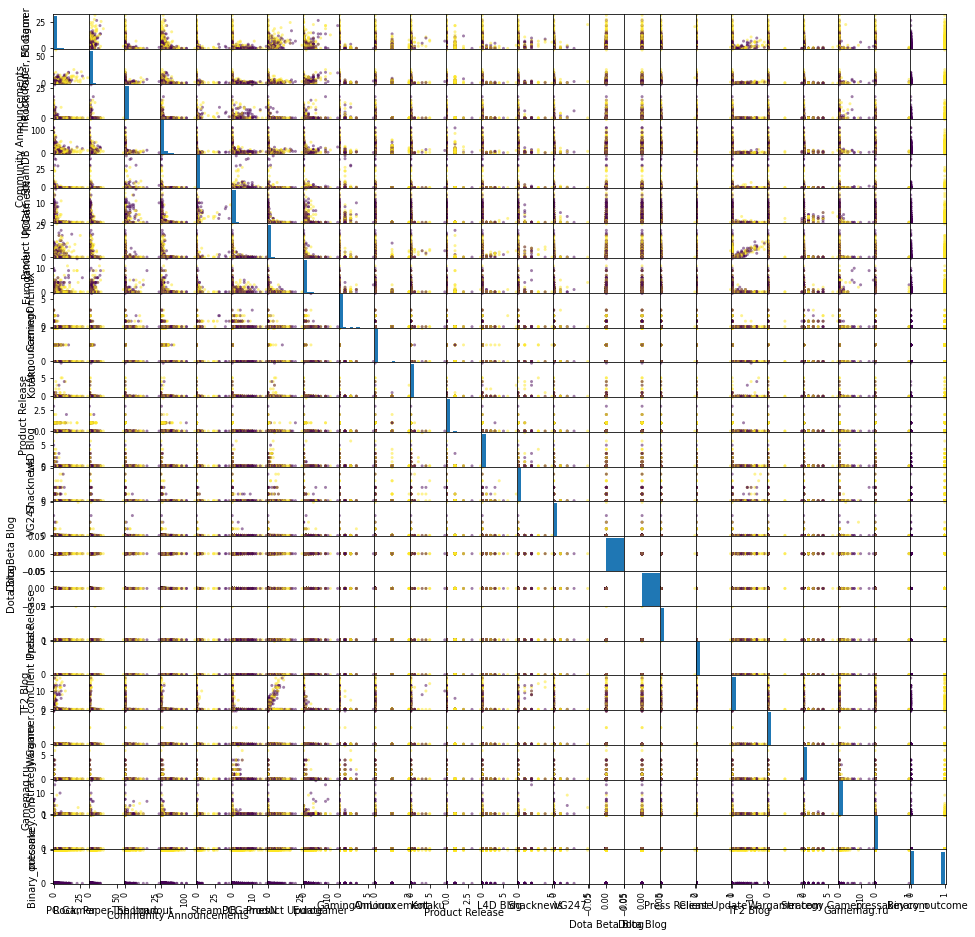

In [62]:
pd.plotting.scatter_matrix(Monthly_data_cleaned_joined, c=Monthly_data_cleaned_joined["Binary_outcome"], figsize=(16,16))
plt.savefig("1.png", format="png")



In [63]:
Monthly_data_cleaned_joined_unsuper = Monthly_data_cleaned_joined.drop(columns=["Binary_outcome"])
Monthly_data_cleaned_joined_unsuper



,PC Gamer,"Rock, Paper, Shotgun",The Loadout,Community Announcements,SteamDB,PCGamesN,Product Update,Eurogamer,GamingOnLinux,Announcement,...,VG247,Dota Beta Blog,Dota Blog,Press Release,Client Update,TF2 Blog,Wargamer.com,Strategy Gamer,Gamemag.ru,pressakey.com
0,2.0,1.0,1.0,2,8.0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1,4.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,3.0,2,4.0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,3.0,1,4.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,2.0,0.0,4,7.0,5.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4966,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4967,0.0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4968,0.0,0.0,0.0,4,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(Monthly_data_cleaned_joined_unsuper))
X



,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.442001,0.056159,0.986715,-0.373230,4.914902,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
1,-0.386803,0.056159,0.986715,-0.481271,2.420626,1.539820,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
2,0.856403,0.056159,3.168685,-0.373230,2.420626,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
3,0.027599,-0.425897,3.168685,-0.481271,2.420626,0.664402,-0.172852,1.090480,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4,-0.386803,0.538215,-0.104269,-0.157149,4.291333,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,-0.386803,-0.425897,-0.104269,-0.481271,-0.073649,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4966,-0.386803,-0.425897,-0.104269,-0.589312,-0.073649,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4967,-0.386803,-0.425897,-0.104269,-0.589312,1.173489,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4968,-0.386803,-0.425897,-0.104269,-0.157149,0.549920,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734


In [65]:
# Initialize PCA model for 90% explained variance
pca = PCA(n_components=0.9)

# Get two principal components for the data.
pcaX = pd.DataFrame(pca.fit_transform(X))
pcaX



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.649632,5.365350,3.907070,-2.028313,0.100548,-1.551169,0.073281,0.262401,0.018055,0.053320,0.303593,0.752225,0.001904,0.714123,0.742430,2.592587,-0.555528,0.453679
1,-0.022009,3.416705,2.699227,-1.406169,0.318277,-0.092091,0.013775,0.120667,0.078196,0.051577,0.142716,0.578727,0.069137,0.384251,0.182337,2.041861,0.519539,1.545832
2,0.956162,5.421037,3.473169,-1.426782,0.034252,-1.481304,0.109225,0.240059,-0.001763,0.026032,0.154374,0.315125,0.004980,0.329287,0.458285,0.167030,0.037259,1.310411
3,0.634650,4.252817,2.526216,-0.692854,0.139622,-0.496089,-0.000022,-0.009855,0.083741,0.064598,0.065599,0.382461,0.065479,0.153536,-0.229451,1.591685,1.426086,1.892933
4,0.300550,4.797567,3.560378,-2.123984,0.313880,-0.986272,0.016416,0.118664,-0.021774,0.065653,0.259984,0.588501,-0.092400,0.764019,0.642537,2.612003,-0.709656,0.871627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,-0.680431,-0.228947,0.115289,0.234559,-0.287207,0.121831,0.236256,0.054972,0.034951,-0.054280,-0.128759,0.048253,0.195049,-0.050237,0.111117,0.095836,0.085065,-0.017917
4966,-0.680610,-0.227231,0.130776,0.246788,-0.318950,0.142140,0.291126,0.056696,0.049882,-0.056919,-0.169269,0.074009,0.238499,-0.080810,0.146838,0.102992,0.094381,-0.021094
4967,-0.615046,0.179530,0.476442,0.118115,-0.396763,-0.292004,0.263873,0.095716,0.056135,-0.046701,-0.070115,0.249675,0.232085,0.040695,0.226291,0.893392,0.035699,-0.451213
4968,-0.647115,-0.030715,0.241659,0.133537,-0.230886,-0.156167,0.058017,0.069309,-0.006716,-0.041256,0.042347,0.058819,0.061492,0.102234,0.043679,0.469568,0.027775,-0.223448


In [66]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(pcaX)
TSNE_DF = pd.DataFrame(tsne_features)
TSNE_DF = TSNE_DF.rename(columns={0: "X", 1: "Y"})

TSNE_DF


,X,Y
0,25.630411,4.291971
1,26.592907,4.354877
2,25.766300,4.327860
3,26.472528,4.402405
4,25.741690,4.302949
...,...,...
4965,44.662941,19.170658
4966,9.430629,-25.109196
4967,13.008620,-14.485534
4968,13.089601,-16.084599


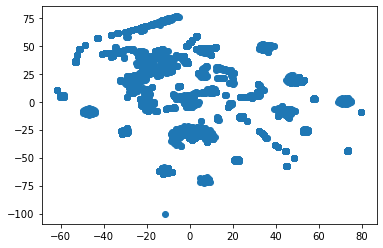

In [67]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y)



In [68]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(TSNE_DF)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow

,k,inertia
0,1,1.073022e+07
1,2,5.897810e+06
2,3,3.687372e+06
3,4,2.720063e+06
4,5,2.204607e+06
5,6,1.844556e+06
6,7,1.650717e+06
7,8,1.334675e+06
8,9,1.136295e+06
9,10,1.008559e+06


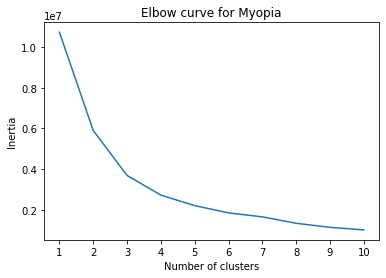

In [69]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for Myopia')
plt.show()



In [70]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Train the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    data["class"] = model.labels_

    return data

In [71]:
clusters = get_clusters(4, TSNE_DF)

In [72]:
clusters

,X,Y,class
0,25.630411,4.291971,2
1,26.592907,4.354877,2
2,25.766300,4.327860,2
3,26.472528,4.402405,2
4,25.741690,4.302949,2
...,...,...,...
4965,44.662941,19.170658,2
4966,9.430629,-25.109196,0
4967,13.008620,-14.485534,0
4968,13.089601,-16.084599,0


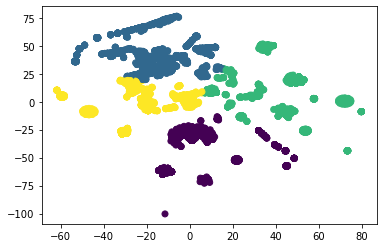

In [73]:
plt.scatter(x=clusters.X, y=clusters.Y, c=clusters["class"])



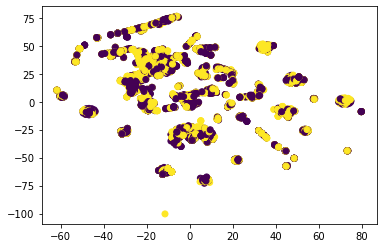

In [74]:
plt.scatter(TSNE_DF.X, TSNE_DF.Y, c=Monthly_data_cleaned_joined.Binary_outcome)



### artificial neural network

In [75]:
input_dimensions=X.shape[1]
input_dimensions

24

In [76]:
X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.442001,0.056159,0.986715,-0.373230,4.914902,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
1,-0.386803,0.056159,0.986715,-0.481271,2.420626,1.539820,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
2,0.856403,0.056159,3.168685,-0.373230,2.420626,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
3,0.027599,-0.425897,3.168685,-0.481271,2.420626,0.664402,-0.172852,1.090480,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4,-0.386803,0.538215,-0.104269,-0.157149,4.291333,4.166075,-0.172852,-0.258036,4.558341,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,-0.386803,-0.425897,-0.104269,-0.481271,-0.073649,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4966,-0.386803,-0.425897,-0.104269,-0.589312,-0.073649,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4967,-0.386803,-0.425897,-0.104269,-0.589312,1.173489,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734
4968,-0.386803,-0.425897,-0.104269,-0.157149,0.549920,-0.211016,-0.172852,-0.258036,-0.128245,-0.180649,...,-0.04554,0.0,0.0,-0.014186,-0.014186,-0.12676,-0.033452,-0.098501,-0.063041,-0.031734


In [77]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=input_dimensions))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [78]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    overwrite=True,
    max_epochs=20,
    hyperband_iterations=2,)

In [1]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

NameError: name 'tuner' is not defined